## Observations and Insights 

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata.head()
#study_results.head()

# Combine the data into a single dataset
combine_data = pd.merge(study_results,mouse_metadata, on = "Mouse ID")
combine_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [30]:
# Checking the number of mice in the DataFrame.

#mice_num = combine_data['Mouse ID'].count()
mice_num = combine_data['Mouse ID'].nunique()
mice_num




249

In [31]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

combine_data[['Mouse ID','Timepoint']].loc[combine_data.duplicated()]
#mice_num = combine_data["Mouse ID"].count()
#mice_num

#dup_mouse = mouse_metadata.loc[mouse_metadata["Mouse ID"].duplicated(keep=False),:] 
#print(combine_data.loc[combine_data['Mouse ID']=='g989'])

,Mouse ID,Timepoint
861,g989,0


In [32]:
# Optional: Get all the data for the duplicate mouse ID. 
combine_data.loc[combine_data.duplicated()]
#combine_data.sort_index()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.0,0,Propriva,Female,21,26


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine_data.drop_duplicates(keep = False , inplace = True)
combine_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [34]:
# Checking the number of mice in the clean DataFrame

#mice_num =clean_df['Mouse ID'].nunique()
#mice_num
combine_data['Mouse ID'].value_counts().head()


g989    11
i901    10
i635    10
y260    10
t451    10
Name: Mouse ID, dtype: int64

## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

#Create inital summary table with Drug Regimes and counts
summary_stats = pd.DataFrame(combine_data.groupby("Drug Regimen").count())
summary_stats.head()

#Use groupby to create summary stats by drug regime, add results into columns in summarystats

summary_stats["Mean"] = pd.DataFrame(combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summary_stats["Median"] = pd.DataFrame(combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summary_stats["Standard Deviation"] = pd.DataFrame(combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summary_stats["Variance"] = pd.DataFrame(combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summary_stats["SEM"] = pd.DataFrame(combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

                             

#Clean up columns, just keeping a count column for some of the graphs below
summary_stats = summary_stats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

#Rename count column
summary_stats = summary_stats.rename(columns = {"Mouse ID" : "Test"})

summary_stats.head()
#summarystats.describe()

 

,Test,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466


## Bar Plots

In [36]:
regimen_data_points = combine_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_data_points

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     159
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

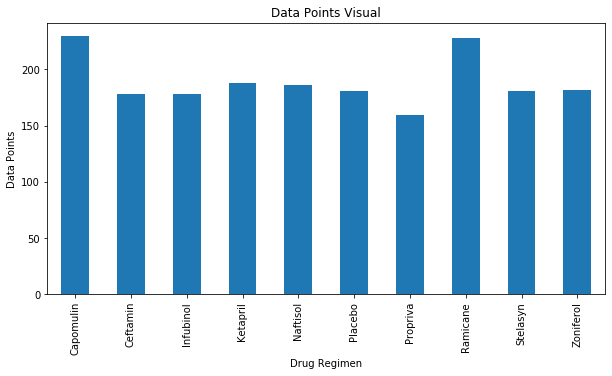

<Figure size 432x288 with 0 Axes>

In [37]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 


# Use DataFrame.plot() in order to create a bar chart of the data
#summary_stats.plot(kind="bar", figsize=(10,5), color = "blue")
#combine_data.groupby = summary_stats.plot( kind ='bar')
# Set a title for the chart
#plt.title("Data Points Chart")
#plt.xlabel("Durg Regimen")
#plt.ylabel("Data Points")
#plt.show()
#plt.tight_layout()

Test= combine_data.groupby(["Drug Regimen"]).count()["Mouse ID"]

Test.plot(kind="bar", figsize=(10,5))

#set chart title
plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

#show chart and set layout
plt.show()
plt.tight_layout()


Text(0, 0.5, 'Data Points')

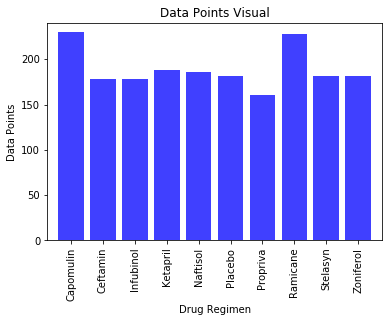

In [38]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout
#the course of the study using pyplot.

users = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

#Set the x_axis to be the amount of the Data Regimen
x_axis = np.arange(len(regimen_data_points))

plt.bar(x_axis, users, color='b', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(users)+10)

plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

## Pie Plots

In [39]:
#groupby_gender = combine_data.groupby(["Mouse ID","Sex"])
#groupby_gender
gender_df = pd.DataFrame(combine_data.groupby(["Sex"]).count()).reset_index()
gender_df.head()
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

,Sex,Count
0,Female,933
1,Male,958


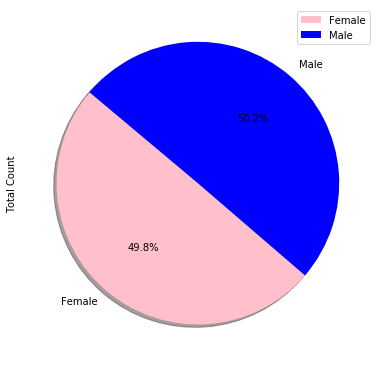

In [40]:

groupby_gender = combine_data.groupby(["Mouse ID","Sex"])
groupby_gender

mouse_gender_df = pd.DataFrame(groupby_gender.size())

#Create the dataframe with total of Female and Male mice
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#create and format the percentage 
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

#format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]
mouse_gender
colors = ['Pink', 'Blue']
explode = (0, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(6.5,6.5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

(-1.118850128107325,
 1.1076024876237407,
 -1.1157270713245522,
 1.1084673217325045)

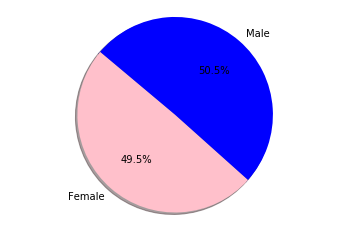

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49,50]

#Set colors for each section of the pie
colors = ['Pink', 'Blue']

#Determoine which section of the circle to detach
explode = (0,0)

#Create the pie chart based upon the values 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#Set equal axis
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.

#Calculate the IQR and quantitatively determine if there are any potential outliers. 

regimes_treat = combine_data[combine_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
regimes_treat = regimes_treat.sort_values(["Timepoint"], ascending=True)
#regimes_treat

regimes_treat = regimes_treat[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

regimes_treat

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,0,45.000000
1613,Ceftamin,x226,0,45.000000
1488,Ceftamin,x581,0,45.000000
1478,Ceftamin,a275,0,45.000000
1468,Ceftamin,k210,0,45.000000
...,...,...,...,...
1824,Capomulin,g316,45,40.159220
1477,Ceftamin,k210,45,68.923185
460,Ramicane,j913,45,31.560470
1497,Ceftamin,x581,45,64.634949


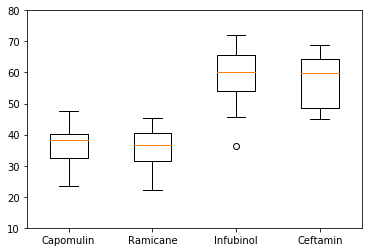

In [43]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

regimes_treat_sort = regimes_treat.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
#regimes_treat_sort.head()


regimes_treat_df =regimes_treat_sort.to_frame()
regimes_treat_df

#Create a list to use as labels 
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = regimes_treat_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

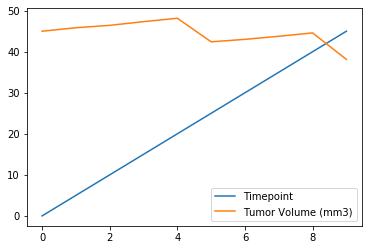

In [53]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

time_vs_tumer = combine_data[combine_data["Mouse ID"].isin(["j119"])]
time_vs_tumer

time_vs_tumer_data = time_vs_tumer[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumer_data

line_plot_df = time_vs_tumer_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()

## Correlation and Regression

In [63]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


mouse_weight = average_cap.iloc[:,0]
avg_tumor_volume = average_cap.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


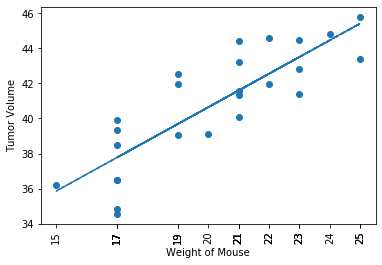

The correlation between weight and tumor value is 0.84


In [64]:

mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()
slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
      
# Create equation of line to calculate
fit = slope * mouse_weight + int

# Plot the linear model on top of scatter plot 
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight,fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(mouse_weight,tumor_volume)[0],2)
print(f'The correlation between weight and tumor value is {corr}')


In [25]:
#Three observations
#1.from the pie plot that distribution of female vs male is almost equal
#2.Fromt the outliers table, there are more outliers for Infubinol and leat number of outliers from Capomulin Regimens
#3.From the scatter plot the weight and the average tumor volume are highly correlated